## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras
import numpy as np

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x= 2 * (( x - np.min(x) ) / ( np.max(x) - np.min(x) ) - 0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64, 32, 16, 8]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidd

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 120us/step - loss: 1.9765 - acc: 0.2675 - val_loss: 1.7889 - val_acc: 0.3540
Epoch 2/100
50000/50000 [==============================] - 4s 90us/step - loss: 1.7077 - acc: 0.3948 - val_loss: 1.6296 - val_acc: 0.4248
Epoch 3/100
50000/50000 [==============================] - 5s 91us/step - loss: 1.5654 - acc: 0.4537 - val_loss: 1.5268 - val_acc: 0.4692
Epoch 4/100
50000/50000 [==============================] - 4s 89us/step - loss: 1.4406 - acc: 0.4969 - val_loss: 1.4620 - val_acc: 0.4857
Epoch 5/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.3417 - acc: 0.5330 - val_loss: 1.4260 - val_acc: 0.5004
Epoch 6/100
50000/50000 [==============================] - 4s 87us/step - loss: 1.2496 - acc: 0.5631 - val_loss: 1.4033 - val_acc: 0.5142
Epoch 7/100
50000/50000 [==============================] - 4s 89us/step -

50000/50000 [==============================] - 5s 90us/step - loss: 0.0945 - acc: 0.9700 - val_loss: 3.1867 - val_acc: 0.5455
Epoch 58/100
50000/50000 [==============================] - 4s 90us/step - loss: 0.0833 - acc: 0.9740 - val_loss: 3.3983 - val_acc: 0.5351
Epoch 59/100
50000/50000 [==============================] - 4s 89us/step - loss: 0.0828 - acc: 0.9741 - val_loss: 3.2556 - val_acc: 0.5409
Epoch 60/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.0826 - acc: 0.9734 - val_loss: 3.2101 - val_acc: 0.5370
Epoch 61/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.0872 - acc: 0.9728 - val_loss: 3.2739 - val_acc: 0.5369
Epoch 62/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.0723 - acc: 0.9771 - val_loss: 3.3196 - val_acc: 0.5455
Epoch 63/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.0777 - acc: 0.9757 - val_loss: 3.3298 - val_acc: 0.5480
Epoch 64/100
50000/50000 [==============

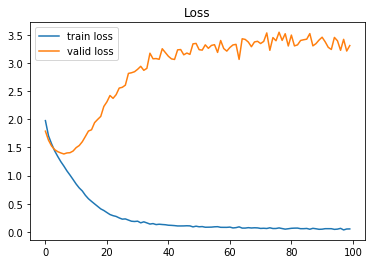

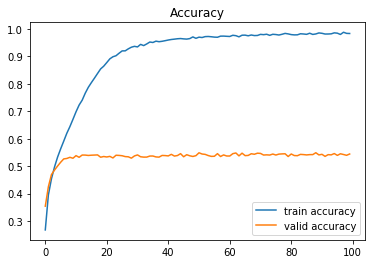

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()